In [4]:
import numpy as np
import matplotlib.pyplot as plt

## Chapter 6

### Problem 6

We will now explore (6.12) and (6.13) further. 			 	

#### Part (a)

Consider (6.12) with $p = 1$. For some choice of $y_1$ and $λ > 0$, plot (6.12) as a function of $β_1$. Your plot should confirm that (6.12) is solved by (6.14).

($y_1-\beta_1)^2+ \lambda \beta_1^2$
Let $y_1=1$ and $\lambda =2$.

In [6]:
beta=np.linspace(-5,5,100)
z=(1-beta)**2 + 2*beta**2

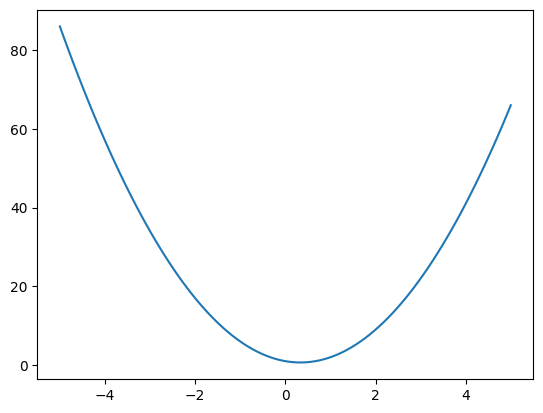

In [7]:
plt.plot(beta,z)

So the minimum is at 1/3, which corresponds to the result from 6.14 as expected.

#### Part (b)

Consider (6.13) with $p = 1$. For some choice of $y_1$ and $λ > 0$, plot (6.13) as a function of $β_1$. Your plot should confirm that (6.13) is solved by (6.15).

Let $y_1=1$ and $\lambda=3$

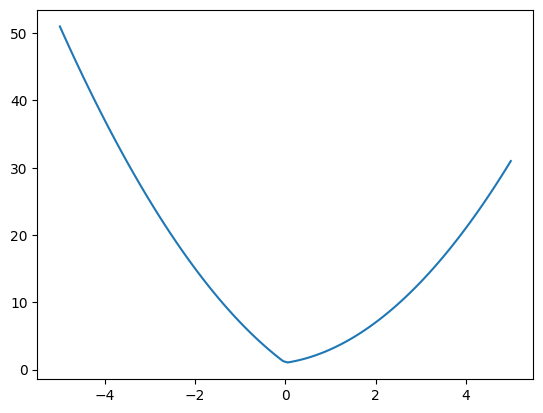

In [11]:
beta=np.linspace(-5,5,100)
z=(1-beta)**2 + 3*np.abs(beta)
plt.plot(beta,z)

The minimum is now at zero as we see in 6.15.

Let's examine all of the piecewise cases in 6.15 for this example.

Here lambda is 1 and $y_1$ is 2.

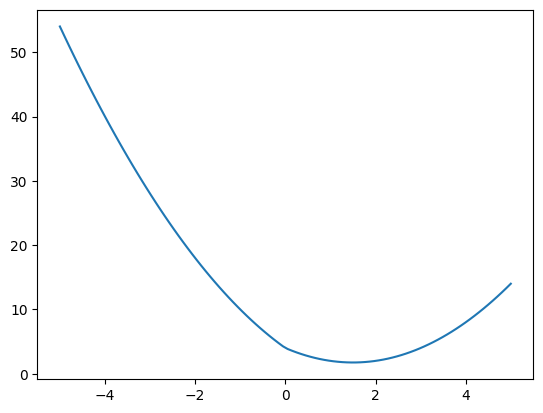

In [13]:
beta=np.linspace(-5,5,100)
z=(2-beta)**2 + 1*np.abs(beta)
plt.plot(beta,z)

### Problem 7

We will now derive the Bayesian connection to the lasso and ridge regression discussed in Section 6.2.2.

#### Part (a)

Suppose that $y_i = β_0 +\sum_{j=1}^p x_{i j} β_j +ε_i$ where $ε_1, \cdots , ε_n$ are independent and identically distributed from a $N(0, σ^2)$ distribution. Write out the likelihood for the data.

### Part (b)

Assume the following prior for $β: β_1, . . . , β_p$ are independent and identically distributed according to a double-exponential distribution with mean 0 and common scale parameter $b$: i.e. $p(β) = 1/(2b)$ exp($−|β|/b)$. Write out the posterior for $β$ in this setting. 

#### Part (c)

Argue that the lasso estimate is the mode for $β$ under this posterior distribution.

#### Part (d)

Now assume the following prior for $β: β_1, . . . , β_p$ are independent and identically distributed according to a normal distribution with mean zero and variance $c$. Write out the posterior for $β$ in this setting.

#### Part (e)

Argue that the ridge regression estimate is both the mode and the mean for $β$ under this posterior distribution.

## Applied Problems

In [24]:
import numpy as np
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)
from sklearn.model_selection import train_test_split
import pandas as pd

### Problem 8

In this exercise, we will generate simulated data, and will then use this data to perform forward and backward stepwise selection.

#### Part (a)

Create a random number generator and use its normal() method to generate a predictor $X$ of length $n = 100$, as well as a noise vector $ε$ of length $n = 100$.

In [28]:
X=np.random.normal(0,1,100)
epsilon=np.random.normal(0,1,100)
X

array([ 0.4572335 , -1.76556029,  0.36838617,  0.56927359,  0.55129041,
        1.13907774,  0.24922913, -1.28251931, -0.74820866,  0.3677955 ,
        1.20520114, -0.8447859 ,  0.73249528,  1.14307102,  0.05492144,
       -0.24515118,  1.21133491,  0.57442164, -0.20698994,  0.94731995,
       -1.08429138, -0.76422176, -0.3143685 , -0.83750149, -0.52257608,
        1.0088131 ,  0.85883599,  0.50377135,  1.49009355,  0.15980179,
        0.04562639, -0.7736824 ,  1.40941272,  0.36896761,  0.58387956,
        0.23900118,  0.69567267,  1.42679467, -0.18462044,  0.30329768,
       -0.2921053 ,  0.13161142,  0.97894645,  0.06669662,  0.24902387,
       -0.25881255,  0.0105527 ,  1.01301623, -0.7117793 ,  0.59359144,
        0.45639779, -1.05886956,  1.93408476,  0.5007196 , -1.02758278,
       -1.23066005, -1.79821777,  0.7464352 , -0.9593348 , -2.59420262,
       -0.47633096, -1.27124049, -1.36578139, -1.41605671,  1.24604554,
       -1.43996817,  0.12709924, -0.48345045, -0.09469981, -2.32

#### Part (b)

Generate a response vector $Y$ of length $n = 100$ according to the model $$Y =β_0 +β_1X+β_2X^2 +β_3X^3 +ε,$$ where $β_0, β_1, β_2, and β_3$ are constants of your choice.

In [20]:
Y=1 + 2*X + 3* X**2 + 4*X**3 + epsilon
Y

array([-2.89651803e-01, -7.43452102e-02,  3.95306411e+01,  5.69269793e+00,
       -7.91216908e-01, -9.59341736e+00,  2.38368273e+00,  5.93219311e-01,
       -2.60190143e+00,  6.00391837e+01,  1.48200094e+01,  1.15595488e+01,
       -3.72556129e+00, -1.59151250e+00,  7.95994253e+00,  9.26879264e-01,
        3.08203987e+00,  1.19150225e+01,  4.97823824e+00, -8.64257486e-01,
       -9.16888291e+00,  3.69248511e+00,  4.18709273e+01,  2.15201909e+00,
        1.22163233e-01,  9.26950750e-02,  4.01711587e-01,  2.09913677e+00,
       -1.66413208e+00,  1.84777842e+00,  3.70086260e+00,  1.27084221e+00,
        5.29687511e+00, -3.53429004e-01, -1.12007511e+01,  7.51077559e+00,
        2.31172551e+01, -8.27482522e+00, -3.13865440e+01, -7.52141680e+01,
        4.14955436e+00, -1.48654803e+00, -2.25789375e-01, -6.27262283e+01,
       -7.85760808e-01,  1.20849042e+00,  1.02562095e+00,  8.03427599e-01,
        6.21609988e+01, -1.92214041e+00,  1.02518350e+00, -1.59560683e+01,
        1.59812895e+01,  

#### Part (c)

Use forward stepwise selection in order to select a model containing the predictors $X, X^2, . . . , X^{10}$. What is the model obtained according to $C_p$? Report the coefficients of the model obtained.

In [21]:
def nCp(sigma2, estimator, X, Y):
    "Negative Cp statistic"
    n, p = X.shape
    Yhat = estimator.predict(X)
    RSS = np.sum((Y - Yhat)**2)
    return -(RSS + 2 * p * sigma2) / n 

In [34]:
df = pd.DataFrame({'X': X, 'Y': Y})

In [26]:
from statsmodels.api import OLS

In [35]:
df

,X,Y
0,0.457233,-0.289652
1,-1.765560,-0.074345
2,0.368386,39.530641
3,0.569274,5.692698
4,0.551290,-0.791217
...,...,...
95,-0.931730,1.251839
96,0.767626,18.516545
97,-1.506286,-1.026136
98,0.778697,8.745734


In [37]:
design = MS(['X'])
design=design.fit(df)
x = design.transform(df)
sigma2 = OLS(Y,x).fit().scale

In [38]:
sigma2 = sm.OLS(Y, x)
results1 = sigma2.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,3.3175,2.405,1.379,0.171
X,-2.6957,2.611,-1.032,0.304


See the lab section on forward stepwise selection!

In [39]:
neg_Cp = partial(nCp, sigma2)

NameError: name 'partial' is not defined

#### Part (d)

Repeat (c), using backwards stepwise selection. How does your answer compare to the results in (c)?

#### Part (e)

Now fit a lasso model to the simulated data, again using $X,X^2, . . . , X^{10}$ as predictors. Use cross-validation to select the optimal value of $λ$. Create plots of the cross-validation error as a function of $λ$. Report the resulting coefficient estimates, and discuss the results obtained.

#### Part (f)

Now generate a response vector $Y$ according to the model $$Y = β_0 + β_7X^7 + ε,$$ and perform forward stepwise selection and the lasso. Discuss the results obtained.

### Problem 9

In this exercise, we will predict the number of applications received using the other variables in the College data set.

#### Part (a)

Split the data set into a training set and a test set.

#### Part (b)

Fit a linear model using least squares on the training set, and report the test error obtained.

#### Part (c)

Fit a ridge regression model on the training set, with $λ$ chosen by cross-validation. Report the test error obtained.

#### Part (d)

Fit a lasso model on the training set, with $λ$ chosen by cross-validation. Report the test error obtained, along with the number of non-zero coefficient estimates.

#### Part (e)

Fit a PCR model on the training set, with $M$ chosen by cross-validation. Report the test error obtained, along with the value of $M$ selected by cross-validation.

#### Part (f)

Fit a PLS model on the training set, with $M$ chosen by cross-validation. Report the test error obtained, along with the value of $M$ selected by cross-validation.

#### Part (g)

Comment on the results obtained. How accurately can we predict the number of college applications received? Is there much difference among the test errors resulting from these five approaches?

### Problem 10

We have seen that as the number of features used in a model increases, the training error will necessarily decrease, but the test error may not. We will now explore this in a simulated data set.

#### Part (a)

Generate a data set with $p = 20$ features, $n = 1000$ observations, and an associated quantitative response vector generated according to the model $$Y =Xβ+ε,$$ where $β$ has some elements that are exactly equal to zero.

#### Part (b)

Split your data set into a training set containing 100 observations and a test set containing 900 observations.

#### Part (c)

Perform best subset selection on the training set, and plot the training set MSE associated with the best model of each size.

#### Part (d)

Plot the test set MSE associated with the best model of each size.

#### Part (e)

For which model size does the test set MSE take on its minimum value? Comment on your results. If it takes on its minimum value for a model containing only an intercept or a model containing all of the features, then play around with the way that you are generating the data in (a) until you come up with a scenario in which the test set MSE is minimized for an intermediate model size.

#### Part (f)

How does the model at which the test set MSE is minimized compare to the true model used to generate the data? Comment on the coefficient values.

#### Part (g)

Create a plot displaying $\sqrt{\sum_{j=1}^p(β_j − \hat{\beta}_j^r)^2}$ for a range of values of $r$, where $\hat{β}_j^r$ is the $j$th coefficient estimate for the best model containing $r$ coefficients. Comment on what you observe. How does this compare to the test MSE plot from (d)?

### Problem 11

We will now try to predict per capita crime rate in the Boston data set.

#### Part (a)

Try out some of the regression methods explored in this chapter, such as best subset selection, the lasso, ridge regression, and PCR. Present and discuss results for the approaches that you consider.

#### Part (b)

Propose a model (or set of models) that seem to perform well on this data set, and justify your answer. Make sure that you are evaluating model performance using validation set error, cross- validation, or some other reasonable alternative, as opposed to using training error.

#### Part (c)

Does your chosen model involve all of the features in the data set? Why or why not?